A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

In [61]:
CD=pd.read_csv("Company_Data (1).csv")
CD

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# Exploratory Data Analysis

In [62]:
CD.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [63]:
CD.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [64]:
CD.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [65]:
CD.duplicated().sum() 

0

In [66]:
CD.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


# Visualizing the data

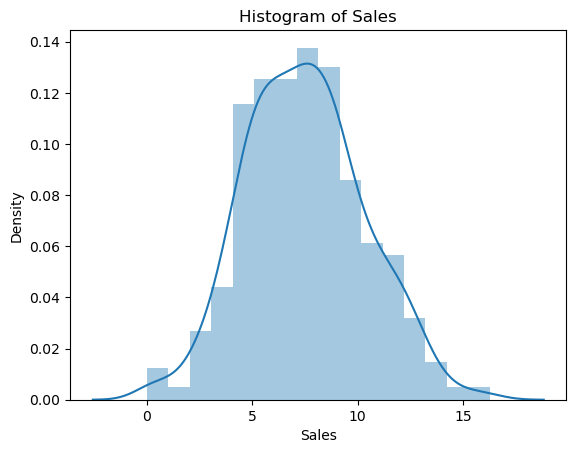

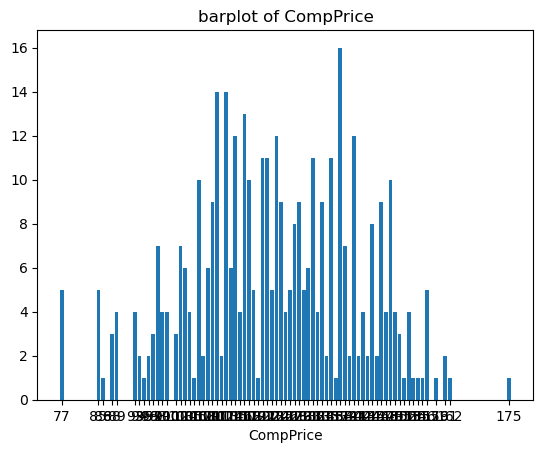

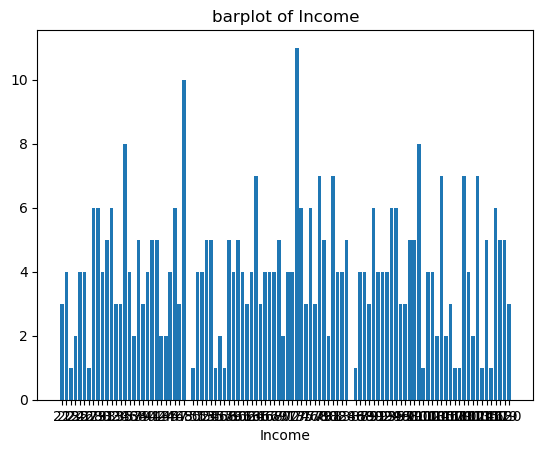

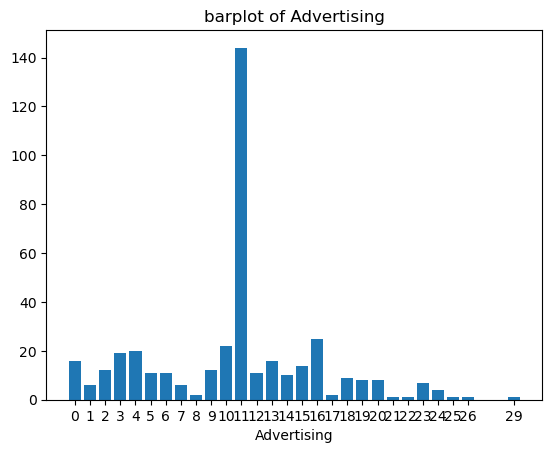

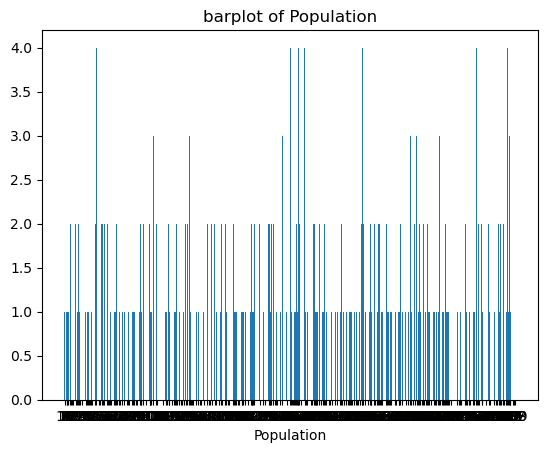

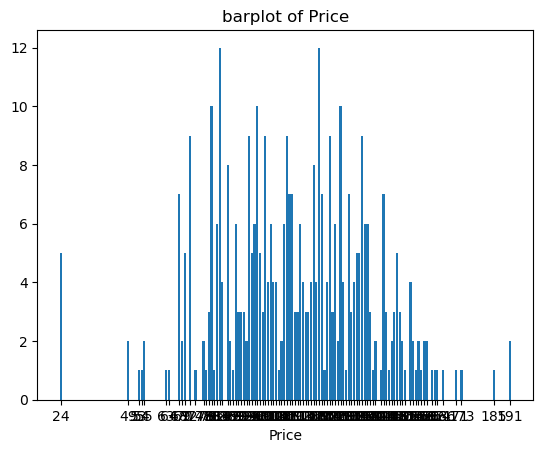

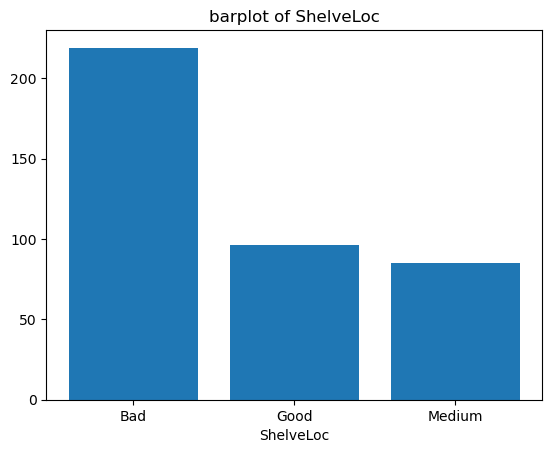

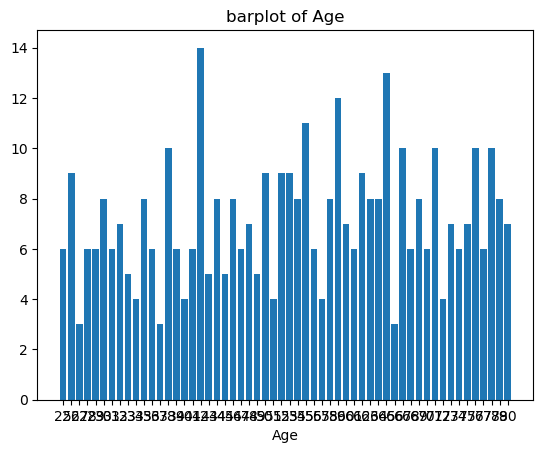

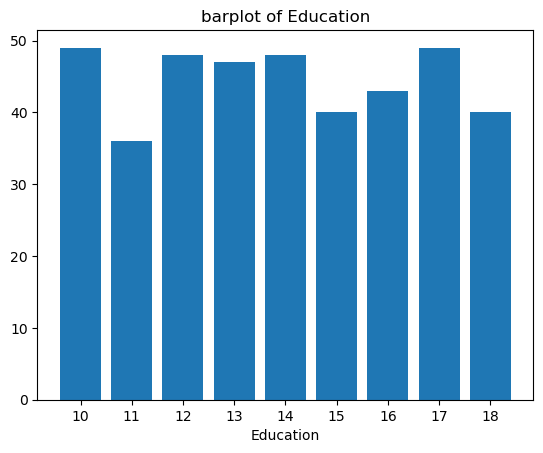

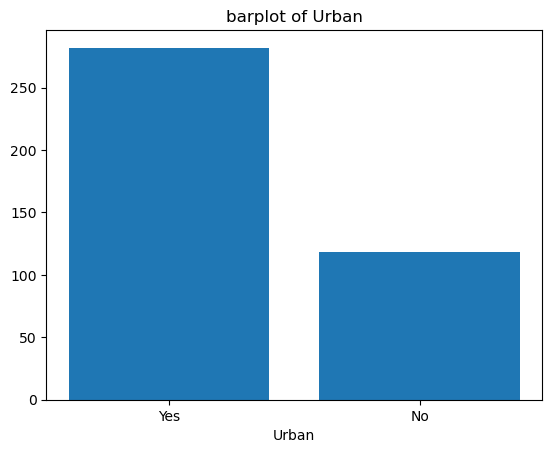

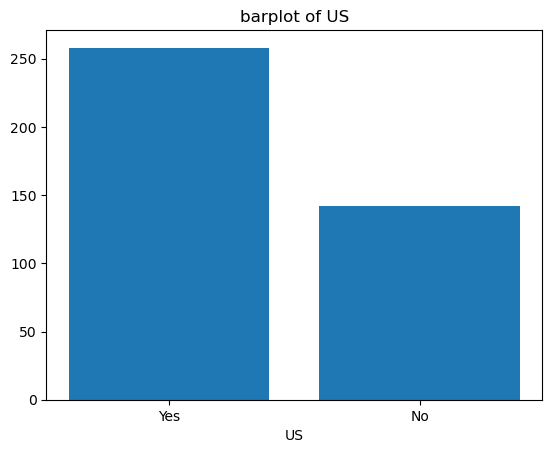

In [67]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
# Loop through each column in the DataFrame
for column in CD.columns:
    if CD[column].dtype == 'float64' :
        # Plot the bar plot
        sns.distplot(CD[column])
        # Add labels and a title to the plot
        plt.xlabel(column)
        plt.title('Histogram of ' + column)
        plt.show()
    else:
        plt.bar(CD[column].unique(),CD[column].value_counts())
        # Add labels and a title to the plot
        plt.xlabel(column)
        plt.xticks(CD[column].unique())
        plt.title('barplot of ' + column)
        # Show the plot
        plt.show()

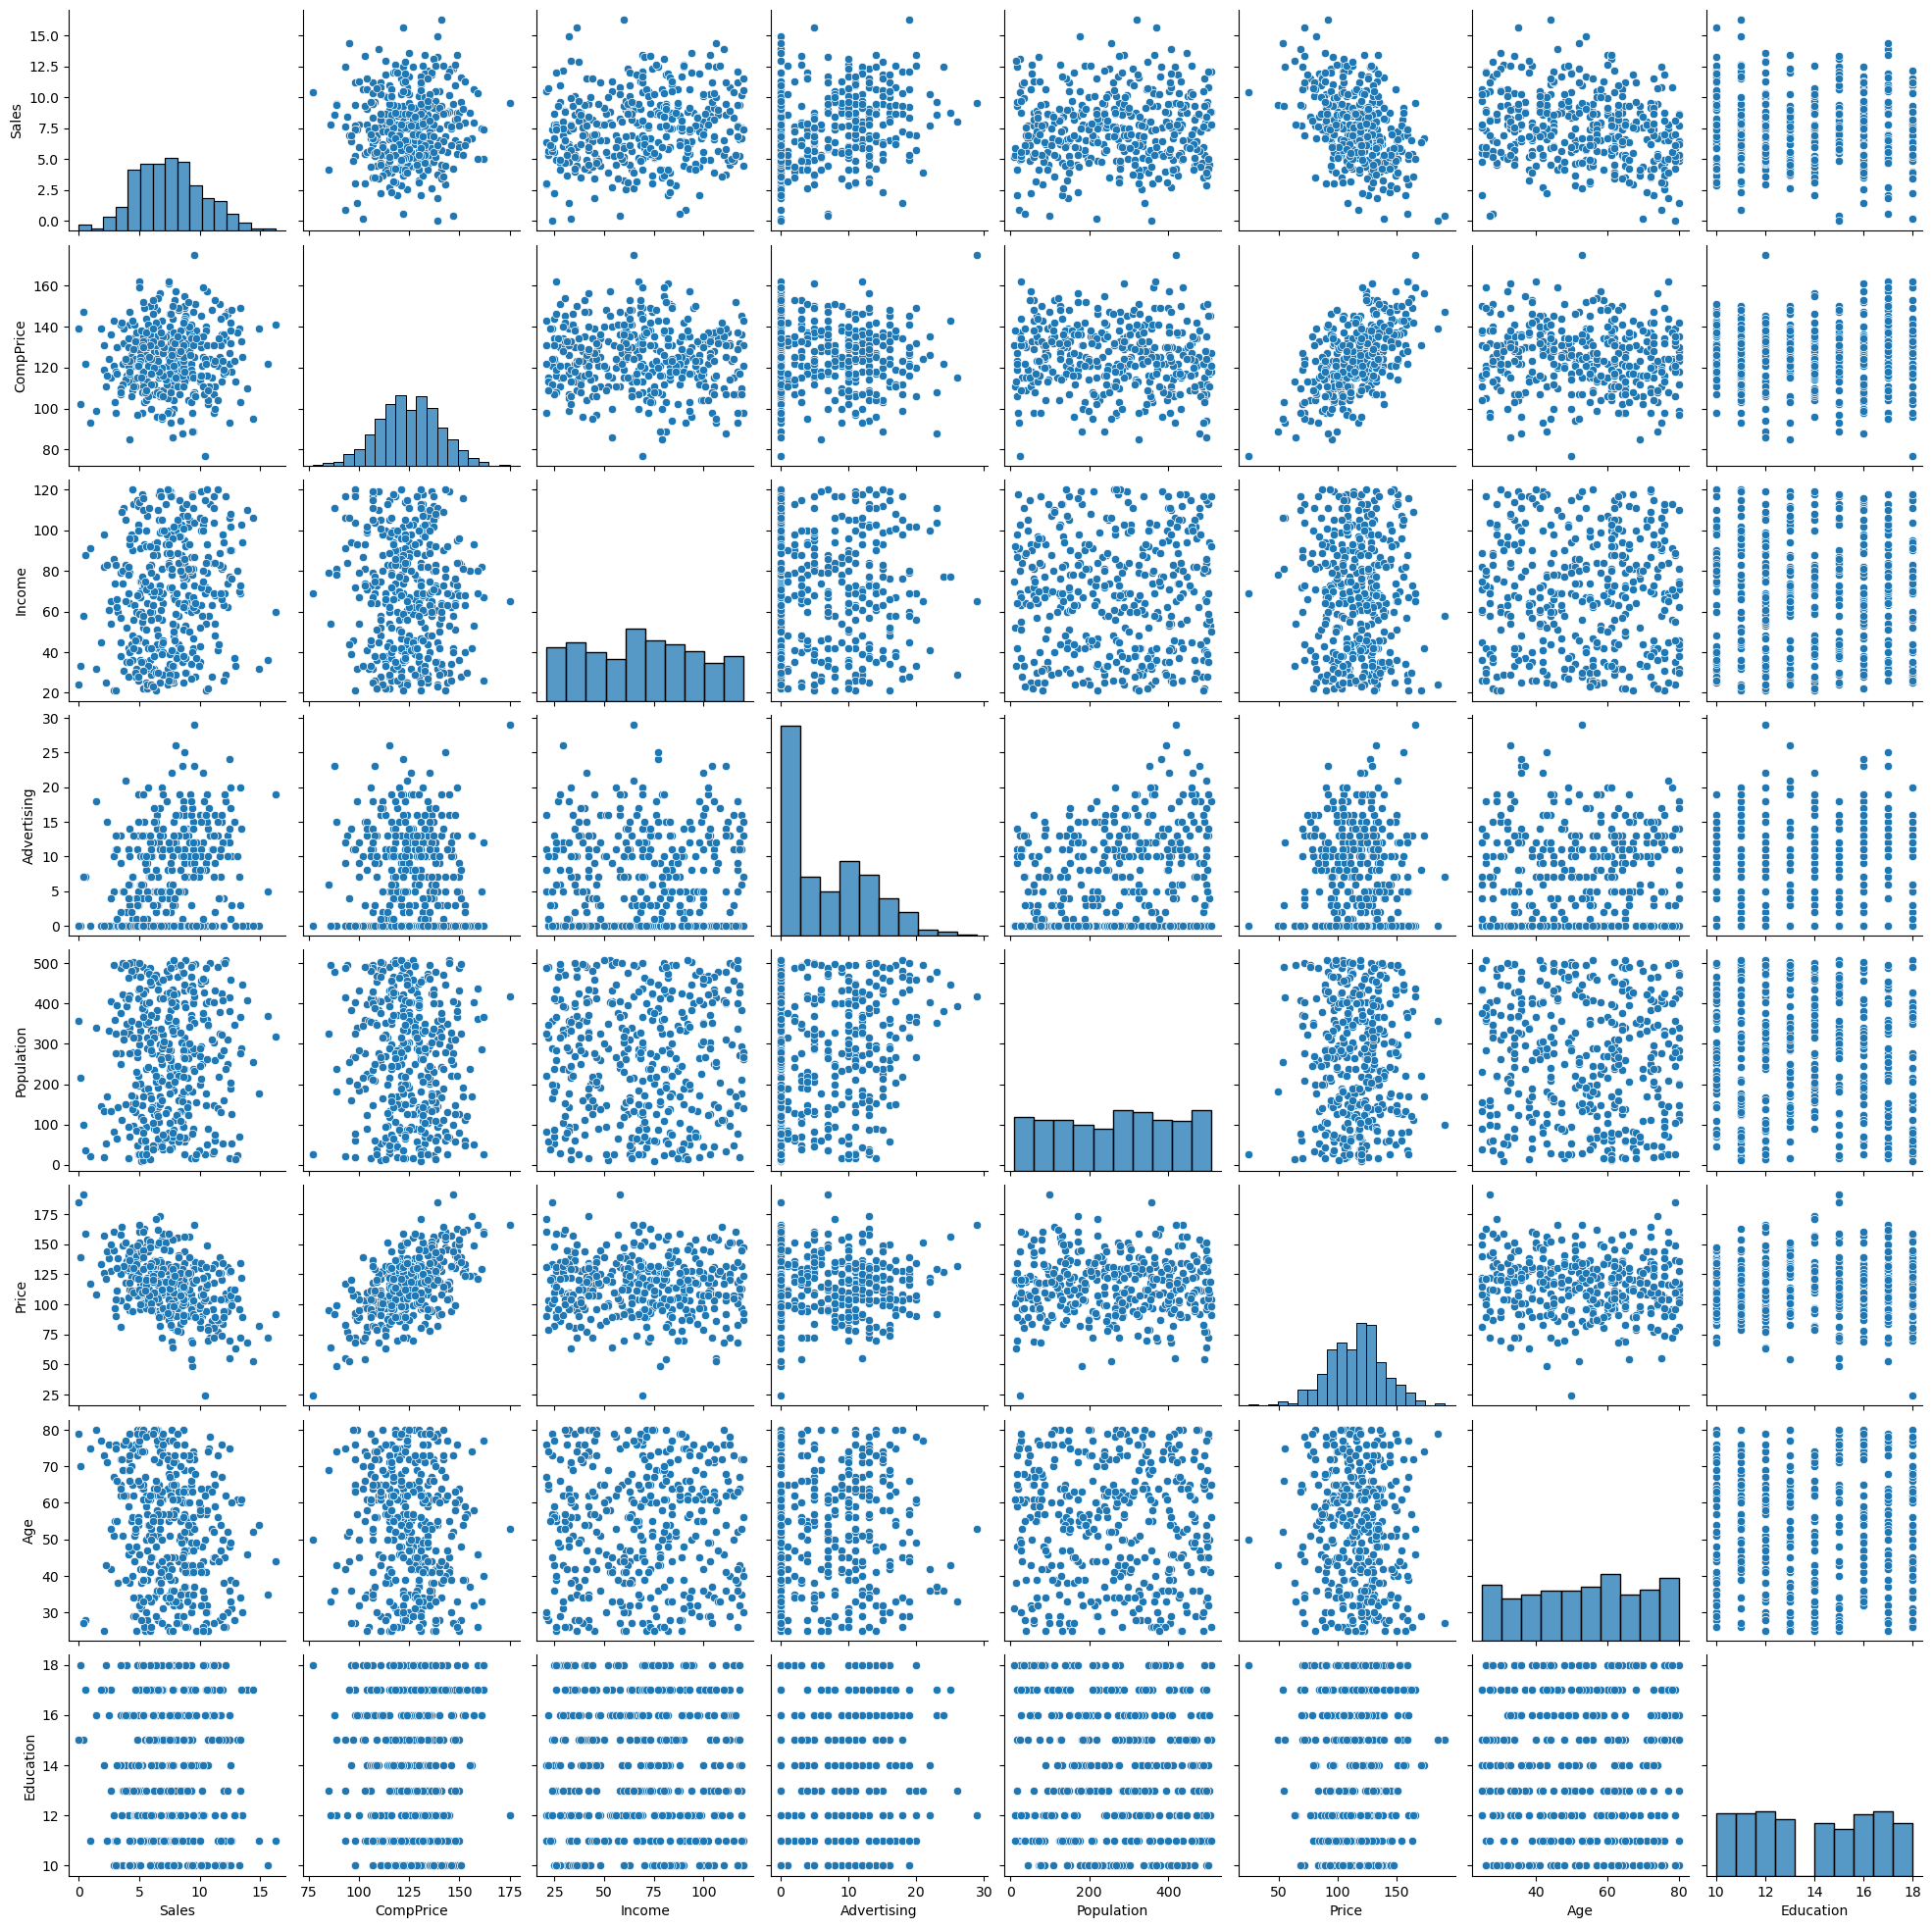

In [68]:
sns.pairplot(CD)

# Label Encoder for categorical variables

In [69]:
from sklearn.preprocessing import LabelEncoder

# Create a sample dataframe with a categorical variable
df =CD
# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Fit and transform the categorical variable using the fit_transform method
df['ShelveLoc'] = le.fit_transform(CD['ShelveLoc'])
df['Urban'] = le.fit_transform(CD['Urban'])
df['US'] = le.fit_transform(CD['US'])
# Print the resulting dataframe
print(df)


     Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          1   33   
396   6.14        139      23            3          37    120          2   55   
397   7.41        162      26           12         368    159          2   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          1   49   

     Education  Urban  US  

In [70]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [71]:
df1 =df

# Scaling the data

In [72]:
# Create an instance of the MinMaxScaler class
scaler = MinMaxScaler()

# Fit and transform the continuous variable using the fit_transform method
df['CompPrice'] = scaler.fit_transform(df[['CompPrice']])
df['Advertising'] = scaler.fit_transform(df[['Advertising']])
df['Price'] = scaler.fit_transform(df[['Price']])
df['Income'] = scaler.fit_transform(df[['Income']])
df['Population'] = scaler.fit_transform(df[['Population']])
df['Age'] = scaler.fit_transform(df[['Age']])
df['Education'] = scaler.fit_transform(df[['Education']])
# Print the resulting dataframe
print(df1)


     Sales  CompPrice    Income  Advertising  Population     Price  ShelveLoc  \
0     9.50   0.622449  0.525253     0.379310    0.533066  0.574850          0   
1    11.22   0.346939  0.272727     0.551724    0.501002  0.353293          1   
2    10.06   0.367347  0.141414     0.344828    0.519038  0.335329          2   
3     7.40   0.408163  0.797980     0.137931    0.913828  0.437126          2   
4     4.15   0.653061  0.434343     0.103448    0.661323  0.622754          0   
..     ...        ...       ...          ...         ...       ...        ...   
395  12.57   0.622449  0.878788     0.586207    0.386774  0.622754          1   
396   6.14   0.632653  0.020202     0.103448    0.054108  0.574850          2   
397   7.41   0.867347  0.050505     0.413793    0.717435  0.808383          2   
398   5.94   0.234694  0.585859     0.241379    0.549098  0.425150          0   
399   9.71   0.581633  0.161616     0.000000    0.034068  0.574850          1   

          Age  Education  U

In [73]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,0.622449,0.525253,0.379310,0.533066,0.574850,0,0.309091,0.875,1,1
1,11.22,0.346939,0.272727,0.551724,0.501002,0.353293,1,0.727273,0.000,1,1
2,10.06,0.367347,0.141414,0.344828,0.519038,0.335329,2,0.618182,0.250,1,1
3,7.40,0.408163,0.797980,0.137931,0.913828,0.437126,2,0.545455,0.500,1,1
4,4.15,0.653061,0.434343,0.103448,0.661323,0.622754,0,0.236364,0.375,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,0.622449,0.878788,0.586207,0.386774,0.622754,1,0.145455,0.500,1,1
396,6.14,0.632653,0.020202,0.103448,0.054108,0.574850,2,0.545455,0.125,0,1
397,7.41,0.867347,0.050505,0.413793,0.717435,0.808383,2,0.272727,1.000,1,1
398,5.94,0.234694,0.585859,0.241379,0.549098,0.425150,0,0.454545,0.250,1,1


# Converting sales data into 4 categories 'Poor','Average','Good','Excellent' by binning sales columns

In [74]:
df1['Sales'] = pd.cut(df1['Sales'], bins=[-0.1    ,  4.0675,  8.135 , 12.2025, 16.28 ],labels=['Poor','Average','Good','Excellent'])

In [75]:
df1['Sales'].unique()

['Good', 'Average', 'Poor', 'Excellent']
Categories (4, object): ['Poor' < 'Average' < 'Good' < 'Excellent']

In [76]:
df1['Sales'].isnull().value_counts()

False    400
Name: Sales, dtype: int64

In [77]:
# Create a sample dataframe with a categorical variable
df2 =df1
# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Fit and transform the categorical variable using the fit_transform method
df2['Sales'] = le.fit_transform(CD['Sales'])
# Print the resulting dataframe
print(df2)


     Sales  CompPrice    Income  Advertising  Population     Price  ShelveLoc  \
0        2   0.622449  0.525253     0.379310    0.533066  0.574850          0   
1        2   0.346939  0.272727     0.551724    0.501002  0.353293          1   
2        2   0.367347  0.141414     0.344828    0.519038  0.335329          2   
3        0   0.408163  0.797980     0.137931    0.913828  0.437126          2   
4        0   0.653061  0.434343     0.103448    0.661323  0.622754          0   
..     ...        ...       ...          ...         ...       ...        ...   
395      1   0.622449  0.878788     0.586207    0.386774  0.622754          1   
396      0   0.632653  0.020202     0.103448    0.054108  0.574850          2   
397      0   0.867347  0.050505     0.413793    0.717435  0.808383          2   
398      0   0.234694  0.585859     0.241379    0.549098  0.425150          0   
399      2   0.581633  0.161616     0.000000    0.034068  0.574850          1   

          Age  Education  U

In [78]:
df2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0.622449,0.525253,0.379310,0.533066,0.574850,0,0.309091,0.875,1,1
1,2,0.346939,0.272727,0.551724,0.501002,0.353293,1,0.727273,0.000,1,1
2,2,0.367347,0.141414,0.344828,0.519038,0.335329,2,0.618182,0.250,1,1
3,0,0.408163,0.797980,0.137931,0.913828,0.437126,2,0.545455,0.500,1,1
4,0,0.653061,0.434343,0.103448,0.661323,0.622754,0,0.236364,0.375,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,0.622449,0.878788,0.586207,0.386774,0.622754,1,0.145455,0.500,1,1
396,0,0.632653,0.020202,0.103448,0.054108,0.574850,2,0.545455,0.125,0,1
397,0,0.867347,0.050505,0.413793,0.717435,0.808383,2,0.272727,1.000,1,1
398,0,0.234694,0.585859,0.241379,0.549098,0.425150,0,0.454545,0.250,1,1


In [79]:
x=df2.iloc[:,1:]
y=df2.iloc[:,0]

In [80]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.622449,0.525253,0.379310,0.533066,0.574850,0,0.309091,0.875,1,1
1,0.346939,0.272727,0.551724,0.501002,0.353293,1,0.727273,0.000,1,1
2,0.367347,0.141414,0.344828,0.519038,0.335329,2,0.618182,0.250,1,1
3,0.408163,0.797980,0.137931,0.913828,0.437126,2,0.545455,0.500,1,1
4,0.653061,0.434343,0.103448,0.661323,0.622754,0,0.236364,0.375,1,0
...,...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,1,0.145455,0.500,1,1
396,0.632653,0.020202,0.103448,0.054108,0.574850,2,0.545455,0.125,0,1
397,0.867347,0.050505,0.413793,0.717435,0.808383,2,0.272727,1.000,1,1
398,0.234694,0.585859,0.241379,0.549098,0.425150,0,0.454545,0.250,1,1


In [81]:
y

0      2
1      2
2      2
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    2
Name: Sales, Length: 400, dtype: int32

In [82]:
y.unique()

array([2, 0, 3, 1])

In [83]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: Sales
Non-Null Count  Dtype
--------------  -----
400 non-null    int32
dtypes: int32(1)
memory usage: 1.7 KB


# Splitting the data as train data and test data

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

# Random Forest Classification

In [85]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
paramters={
    
    "n_estimators":[10,20,30,40,100],
    "max_features":[2,4,6]
}

In [86]:
from sklearn.model_selection import GridSearchCV
grcv=GridSearchCV(model,paramters,cv=10)

In [87]:
grcv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 4, 6],
                         'n_estimators': [10, 20, 30, 40, 100]})

In [88]:
grcv.best_score_

0.6

In [89]:
grcv.best_params_

{'max_features': 4, 'n_estimators': 30}

In [90]:
final_model=RandomForestClassifier(max_features=4, n_estimators=30)

In [91]:
final_model.fit(x_train,y_train)

RandomForestClassifier(max_features=4, n_estimators=30)

In [92]:
print(classification_report(y_test,final_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78        74
           1       0.00      0.00      0.00         5
           2       0.56      0.64      0.60        36
           3       0.33      0.20      0.25         5

    accuracy                           0.68       120
   macro avg       0.42      0.41      0.41       120
weighted avg       0.66      0.68      0.67       120



In [93]:
final_model.feature_importances_

array([0.14486593, 0.1188529 , 0.09414526, 0.12330551, 0.19343174,
       0.10194201, 0.11617088, 0.07403209, 0.01354726, 0.01970643])

In [94]:
df2.columns[:-1]

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban'],
      dtype='object')

In [95]:
preds = final_model.predict(x_test) 
pd.Series(preds).value_counts()

0    75
2    41
3     3
1     1
dtype: int64

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,preds)


array([[58,  0, 14,  2],
       [ 1,  0,  4,  0],
       [12,  1, 23,  0],
       [ 4,  0,  0,  1]], dtype=int64)

In [97]:
model1 = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5)
model1.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

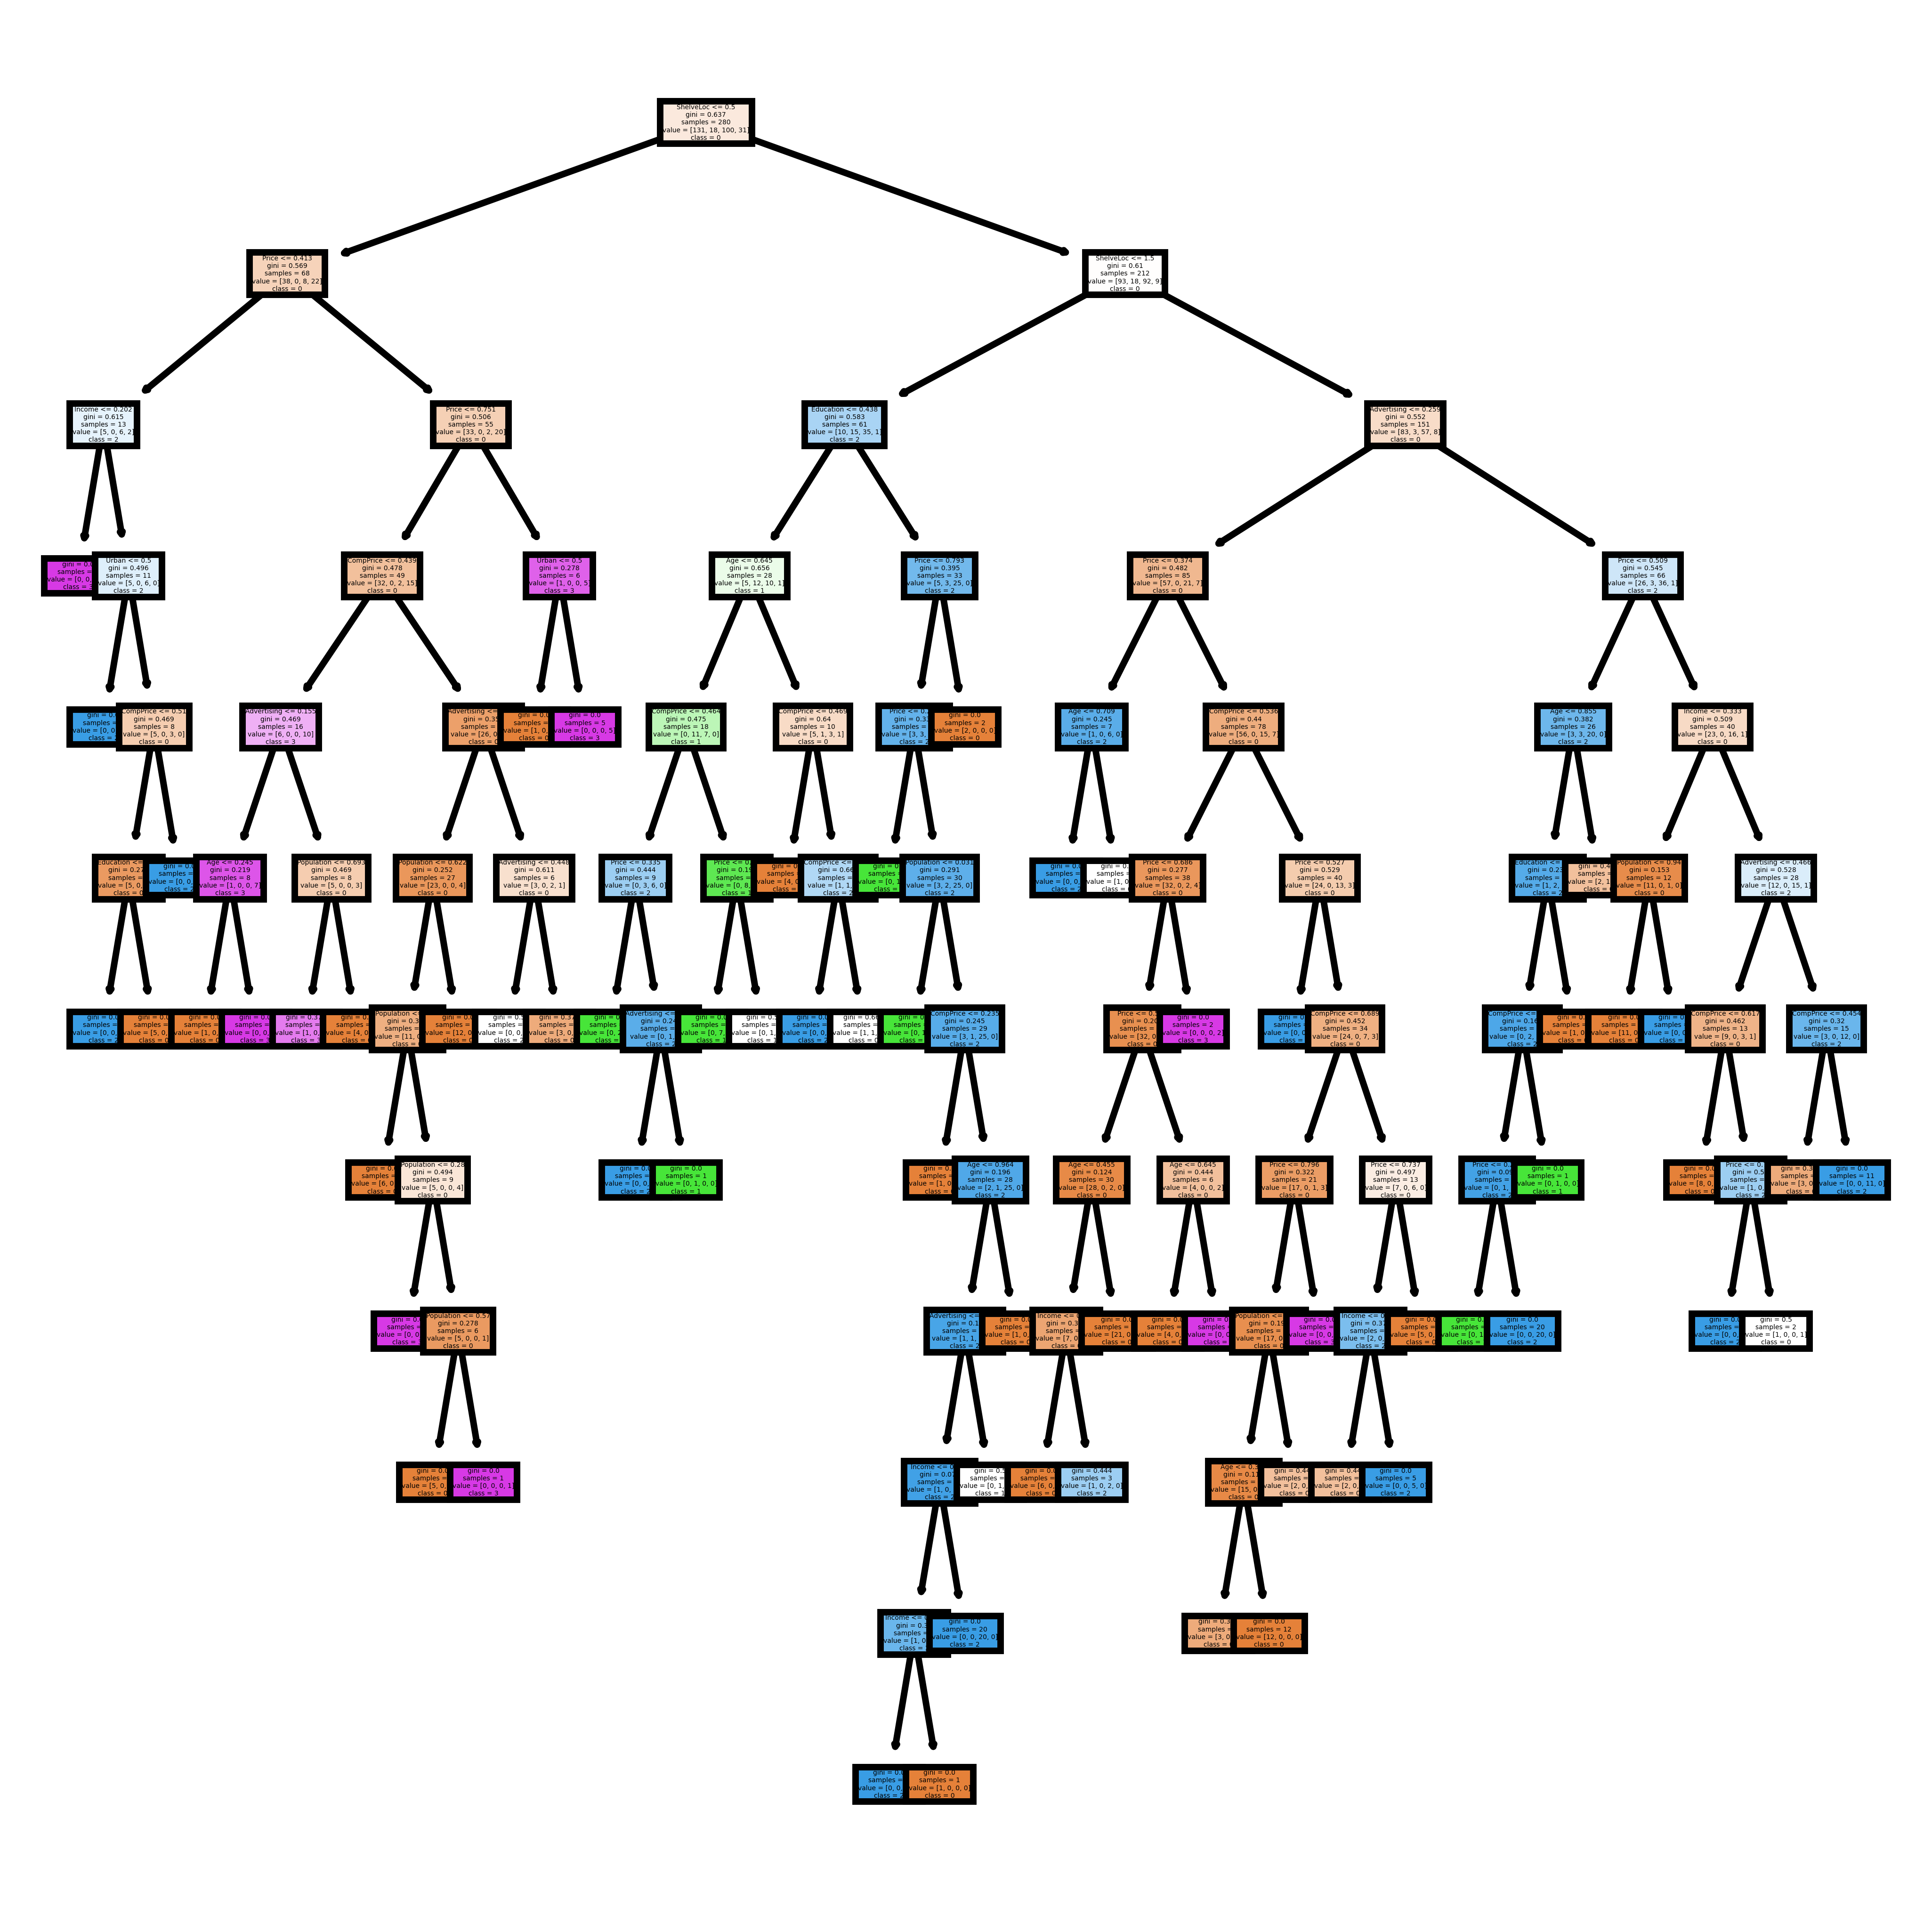

In [98]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['0','1','2','3'] # 0='Poor',1='Average',2='Good',3='Excellent'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=1000)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Bagged decision tree for classification

In [99]:
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier

In [104]:
num_trees=100
model1=BaggingClassifier(max_samples=0.8,n_estimators=num_trees,random_state=8)
results=cross_val_score(model1,x_train,y_train,cv=10)
print(results.mean())

0.5714285714285714


In [105]:
model2=BaggingClassifier(max_samples=0.8,n_estimators=num_trees,random_state=8)
model2.fit(x_train,y_train)
pred=model2.predict(x_test)
print(CR(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        74
           1       0.00      0.00      0.00         5
           2       0.62      0.72      0.67        36
           3       0.00      0.00      0.00         5

    accuracy                           0.73       120
   macro avg       0.36      0.39      0.37       120
weighted avg       0.68      0.72      0.70       120



# Adaboost classification or Boosting

In [106]:
from sklearn.ensemble import AdaBoostClassifier as AD

In [107]:
num_trees=10
model4=AD(n_estimators=num_trees,learning_rate=0.8,random_state=15)
results=cross_val_score(model4,x_train,y_train,cv=10)
print(results.mean())
model4.fit(x_train,y_train)
pred2=model4.predict(x_test)
print(CR(y_test,pred2))

0.5964285714285713
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        74
           1       1.00      0.20      0.33         5
           2       0.64      0.75      0.69        36
           3       0.00      0.00      0.00         5

    accuracy                           0.77       120
   macro avg       0.62      0.45      0.47       120
weighted avg       0.75      0.77      0.74       120

